<a href="https://colab.research.google.com/github/PaulToronto/Review-of-Linear-Algebra-Basics/blob/main/2_Projections_and_Components_of_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projections and Components of Vectors

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym

## Functions

In [2]:
v_length = lambda x: np.sqrt(x[0]**2 + x[1]**2)

# this is cheating a bit, determining the angle
#  is covered in the notebook on The Dot Product
v_angle = lambda a, b: np.arccos(a.dot(b) / (v_length(a) * v_length(b)))

<img src='https://drive.google.com/uc?export=view&id=1dGmZH787RuLlSFWCl8v1Ytb3MB86y0DK'>

$\theta$ is the angle between $\mathbf{a}$ and $\mathbf{b}$, $0 \le \mathbf{a} \le \pi$

$$
\begin{align}
\cos{\theta} &= \frac{x}{\left|\mathbf{a}\right|} \\
\implies x &= \left|\mathbf{a}\right|\cos{\theta}
\end{align}
$$

The **component** or **scalar projection** of $\mathbf{a}$ on $\mathbf{b}$:

$$
\text{comp}_{\mathbf{b}}{\mathbf{a}} = \left|\mathbf{a}\right|\cos{\theta}
$$

The **projection** or **vector projection** of $\mathbf{a}$ on $\mathbf{b}$, denoted $\text{proj}_{\mathbf{b}}\mathbf{a}$:

$$
\text{proj}_{\mathbf{b}}{\mathbf{a}} =  \left|\mathbf{a}\right|\cos{\theta}\frac{\mathbf{b}}{\left|\mathbf{b}\right|}
$$

But using the dot product

$$
\begin{align}
\mathbf{a} \cdot \mathbf{b} &= \left|\mathbf{a}\right|\left|\mathbf{b}\right| \cos{\theta} \\
\implies \left|\mathbf{a}\right| \cos{\theta}  &= \frac{\mathbf{a} \cdot \mathbf{b}}{\left|\mathbf{b}\right|}
\end{align}
$$

We now have two formulas each for the scalar projection and the vector projections.

### Scalar projection aka component of a on b

$$
\begin{align}
\text{comp}_{\mathbf{b}}{\mathbf{a}} &= \left|\mathbf{a}\right|\cos{\theta}\\
&= \frac{\mathbf{a} \cdot \mathbf{b}}{\left|\mathbf{b}\right|}
\end{align}
$$

### Vector projection aks projection of a on b

$$
\begin{align}
\text{proj}_{\mathbf{b}}{\mathbf{a}} &=  \left|\mathbf{a}\right|\cos{\theta}\frac{\mathbf{b}}{\left|\mathbf{b}\right|} \\
&= \frac{\mathbf{a} \cdot \mathbf{b}}{\left|\mathbf{b}\right|} \frac{\mathbf{b}}{\left|\mathbf{b}\right|} \\
&= \frac{\mathbf{a}\cdot\mathbf{b}}{\left|\mathbf{b}\right|^{2}}\mathbf{b} \\
&= \frac{\mathbf{a}\cdot\mathbf{b}}{\mathbf{b}\cdot\mathbf{b}}\mathbf{b}
\end{align}
$$

## Example 1

In [3]:
a = np.array([5, 6])
b = np.array([9, 0])

a_length = v_length(a)
b_length = v_length(b)
theta = v_angle(a, b)

comp_a_on_b1 = a_length * np.cos(theta)
comp_a_on_b2 = a.dot(b) / b_length

proj_a_on_b1 = a_length * np.cos(theta) * (b / b_length)
proj_a_on_b2 = (a.dot(b) / b.dot(b)) * b

comp_a_on_b1, comp_a_on_b2, proj_a_on_b1, proj_a_on_b2

(5.0, 5.0, array([5., 0.]), array([5., 0.]))

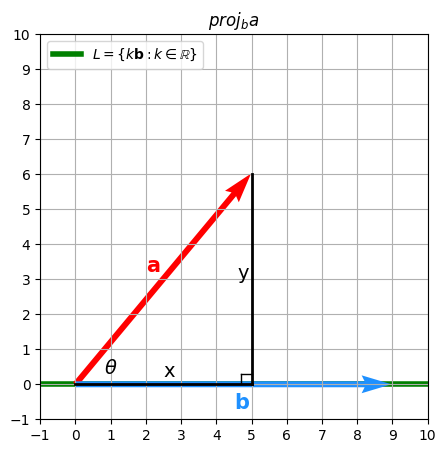

In [4]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# vector a
plt.quiver(0, 0, *a, scale=1, units='xy',
           color='red', width=0.17)
plt.annotate('$\mathbf{a}$', xy=(2, 3.2),
             size=15, color='red')
# vector b
plt.quiver(0, 0, *b, scale=1, units='xy',
           color='dodgerblue', width=0.17)
plt.annotate('$\mathbf{b}$', xy=(4.5, -0.7),
             size=15, color='dodgerblue')

# line L
x_l = np.linspace(-1, 10, 100)
y_l = np.zeros_like(x_l)
plt.plot(x_l, y_l, color='green',
         linewidth=4, label='$L = \{k\mathbf{b}:k \in \mathbb{R}\}$', zorder=-1)

# adjacent side
ax.add_line(plt.Line2D(xdata=(0, 5), ydata=(0, 0), color='black', linewidth=2))
plt.annotate('x', xy=(2.5, 0.2),
             size=14, color='black')
# opposite side
ax.add_line(plt.Line2D(xdata=(5, 5), ydata=(0, 6), color='black', linewidth=2))
plt.annotate('y', xy=(4.6, 3),
             size=14, color='black')

# right-angle
ax.add_line(plt.Line2D(xdata=(4.7, 4.7), ydata=(0, 0.3), color='black', linewidth=1))
ax.add_line(plt.Line2D(xdata=(4.7, 5), ydata=(0.3, 0.3), color='black', linewidth=1))

# theta
plt.annotate(r'$\theta$', xy=(0.8, 0.3), size=14)

plt.title('$proj_{b}a$')
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xticks(np.linspace(-1, 10, 12))
plt.yticks(np.linspace(-1, 10, 12))
plt.grid()
plt.legend(loc='upper left')
plt.show()

## Example 2

In [5]:
a = np.array([-5, 6])
b = np.array([9, 0])

a_length = v_length(a)
b_length = v_length(b)
theta = v_angle(a, b)

comp_a_on_b1 = a_length * np.cos(theta)
comp_a_on_b2 = a.dot(b) / b_length

proj_a_on_b1 = a_length * np.cos(theta) * (b / b_length)
proj_a_on_b2 = (a.dot(b) / b.dot(b)) * b

comp_a_on_b1, comp_a_on_b2, proj_a_on_b1, proj_a_on_b2

(-5.0, -5.0, array([-5., -0.]), array([-5., -0.]))

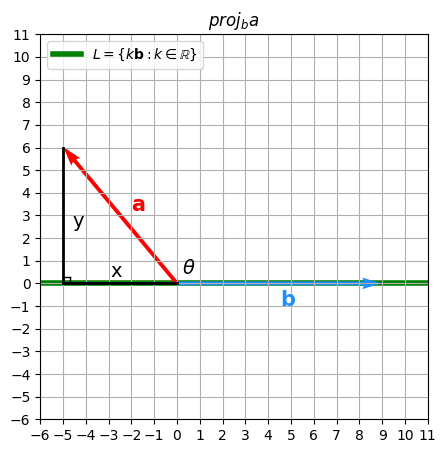

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# vector a
plt.quiver(0, 0, *a, scale=1, units='xy',
           color='red', width=0.17)
plt.annotate('$\mathbf{a}$', xy=(-2, 3.2),
             size=15, color='red')
# vector b
plt.quiver(0, 0, *b, scale=1, units='xy',
           color='dodgerblue', width=0.17)
plt.annotate('$\mathbf{b}$', xy=(4.5, -1),
             size=15, color='dodgerblue')

# line L
x_l = np.linspace(-6, 11, 100)
y_l = np.zeros_like(x_l)
plt.plot(x_l, y_l, color='green',
         linewidth=4, label='$L = \{k\mathbf{b}:k \in \mathbb{R}\}$', zorder=-1)

# adjacent side
ax.add_line(plt.Line2D(xdata=(0, -5), ydata=(0, 0), color='black', linewidth=2))
plt.annotate('x', xy=(-2.9, 0.3),
             size=14, color='black')
# opposite side
ax.add_line(plt.Line2D(xdata=(-5, -5), ydata=(0, 6), color='black', linewidth=2))
plt.annotate('y', xy=(-4.6, 2.5),
             size=14, color='black')

# right-angle
ax.add_line(plt.Line2D(xdata=(-4.7, -4.7), ydata=(0, 0.3), color='black', linewidth=1))
ax.add_line(plt.Line2D(xdata=(-4.7, -5), ydata=(0.3, 0.3), color='black', linewidth=1))

# theta
plt.annotate(r'$\theta$', xy=(0.2, 0.4), size=14)

plt.title('$proj_{b}a$')
plt.xlim(-6, 11)
plt.ylim(-6, 11)
plt.xticks(np.linspace(-6, 11, 18))
plt.yticks(np.linspace(-6, 11, 18))
plt.grid()
plt.legend(loc='upper left')
plt.show()

## Example 3

In [7]:
a = np.array([1, 8])
b = np.array([3, 4])

a_length = v_length(a)
b_length = v_length(b)
theta = v_angle(a, b)

comp_a_on_b1 = a_length * np.cos(theta)
comp_a_on_b2 = a.dot(b) / b_length

proj_a_on_b1 = a_length * np.cos(theta) * (b / b_length)
proj_a_on_b2 = (a.dot(b) / b.dot(b)) * b

comp_a_on_b1, comp_a_on_b2, proj_a_on_b1, proj_a_on_b2, v_length(proj_a_on_b2)

(7.0, 7.0, array([4.2, 5.6]), array([4.2, 5.6]), 6.999999999999999)

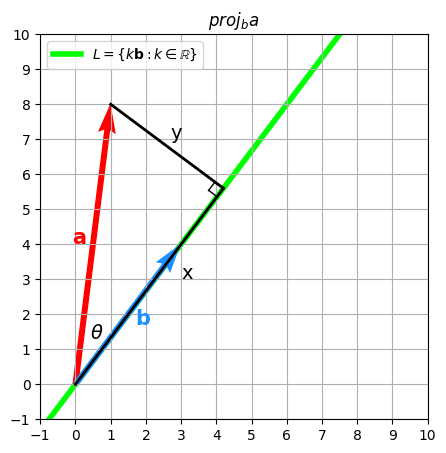

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# vector a
plt.quiver(0, 0, *a, scale=1, units='xy',
           color='red', width=0.17)
plt.annotate('$\mathbf{a}$', xy=(-0.1, 4),
             size=15, color='red')
# vector b
plt.quiver(0, 0, *b, scale=1, units='xy',
           color='dodgerblue', width=0.17)
plt.annotate('$\mathbf{b}$', xy=(1.7, 1.7),
             size=15, color='dodgerblue')

# line L
x_l = np.linspace(-1, 10, 100)
y_l = (4/3) * x_l
plt.plot(x_l, y_l, color='lime',
         linewidth=4, label='$L = \{k\mathbf{b}:k \in \mathbb{R}\}$', zorder=-1)

# adjacent side
ax.add_line(plt.Line2D(xdata=(21/5, 0), ydata=(28/5, 0), color='black', linewidth=2))
plt.annotate('x', xy=(3, 3),
             size=14, color='black')
# opposite side
ax.add_line(plt.Line2D(xdata=(21/5, 1), ydata=(28/5, 8), color='black', linewidth=2))
plt.annotate('y', xy=(2.7, 7),
             size=14, color='black')

# right-angle
ax.add_line(plt.Line2D(xdata=(99/25, 189/50), ydata=(289/50, 277/50), color='black', linewidth=1))
ax.add_line(plt.Line2D(xdata=(201/50, 189/50), ydata=(134/25, 277/50), color='black', linewidth=1))

# theta
plt.annotate(r'$\theta$', xy=(0.4, 1.3), size=14)

plt.title('$proj_{b}a$')
plt.xlim(-1, 10)
plt.ylim(-1, 10)
plt.xticks(np.linspace(-1, 10, 12))
plt.yticks(np.linspace(-1, 10, 12))
plt.grid()
plt.legend(loc='upper left')
plt.show()

## Components of a vector, $\mathbf{x}$, on unit basis vectors $\mathbf{i}$, $\mathbf{j}$ and $\mathbf{k}$

### The components of $\mathbf{x} = (x_1, x_2)$ on $\mathbf{i}$ and $\mathbf{j}$

In [9]:
x1, x2, x3 = sym.symbols('x_1 x_2 x_3')

In [10]:
x = sym.Matrix([x1, x2])
i = sym.Matrix([1, 0])
j = sym.Matrix([0, 1])

In [11]:
x

Matrix([
[x_1],
[x_2]])

In [12]:
i

Matrix([
[1],
[0]])

In [13]:
j

Matrix([
[0],
[1]])

In [14]:
v_length_sym = lambda a: sym.sqrt(a.dot(a))
v_angle_sym = lambda a, b: sym.acos(a.dot(b) / (v_length_sym(a) * v_length_sym(b)))

In [15]:
v_length_sym(x)

sqrt(x_1**2 + x_2**2)

In [16]:
v_angle_sym(x, i)

acos(x_1/sqrt(x_1**2 + x_2**2))

In [17]:
v_length_sym(x) * sym.cos(v_angle_sym(x, i))

x_1

In [18]:
# alternately
x.dot(i) / v_length_sym(i)

x_1

In [19]:
v_length_sym(x) * sym.cos(v_angle_sym(x, j))

x_2

In [20]:
# altnernately
x.dot(j) / v_length_sym(j)

x_2

### The components of $\mathbf{x} = (x_1, x_2, x_3)$ on $\mathbf{i}$, $\mathbf{j}$ and $\mathbf{k}$

In [21]:
x = sym.Matrix([x1, x2, x3])
i = sym.Matrix([1, 0, 0])
j = sym.Matrix([0, 1, 0])
k = sym.Matrix([0, 0, 1])

In [22]:
x

Matrix([
[x_1],
[x_2],
[x_3]])

In [23]:
i

Matrix([
[1],
[0],
[0]])

In [24]:
j

Matrix([
[0],
[1],
[0]])

In [25]:
k

Matrix([
[0],
[0],
[1]])

In [26]:
for unit_basis in (i, j, k):
    display(v_length_sym(x) * sym.cos(v_angle_sym(x, unit_basis)))

x_1

x_2

x_3

In [27]:
my_vector_sum = sym.Matrix([0, 0, 0])
for unit_basis in (i, j, k):
    my_vector_sum += (v_length_sym(x) * sym.cos(v_angle_sym(x, unit_basis))) * unit_basis

my_vector_sum

Matrix([
[x_1],
[x_2],
[x_3]])

## Theorem

The sum of the components of $\mathbf{a}$ and $\mathbf{c}$ on $\mathbf{b}$ equals the component of the sum $\mathbf{a} + \mathbf{c}$ on $\mathbf{b}$

In [28]:
a1, a2, a3 = sym.symbols('a_1 a_2 a_3')
b1, b2, b3 = sym.symbols('b_1 b_2 b_3')
c1, c2, c3 = sym.symbols('c_1 c_2 c_3')

a = sym.Matrix([a1, a2, a3])
b = sym.Matrix([b1, b2, b3])
c = sym.Matrix([c1, c2, c3])

In [29]:
display(a); print('\n'); display(b); print('\n'); display(c)

Matrix([
[a_1],
[a_2],
[a_3]])

Matrix([
[b_1],
[b_2],
[b_3]])

Matrix([
[c_1],
[c_2],
[c_3]])

In [30]:
proj_a_on_b = v_length_sym(a) * sym.cos(v_angle_sym(a, b))
proj_c_on_b = v_length_sym(c) * sym.cos(v_angle_sym(c, b))
(proj_a_on_b + proj_c_on_b).simplify()

(a_1*b_1 + a_2*b_2 + a_3*b_3 + b_1*c_1 + b_2*c_2 + b_3*c_3)/sqrt(b_1**2 + b_2**2 + b_3**2)

In [31]:
a_plus_c = a + c
a_plus_c

Matrix([
[a_1 + c_1],
[a_2 + c_2],
[a_3 + c_3]])

In [32]:
proj_a_plus_c_on_b = v_length_sym(a_plus_c) * sym.cos(v_angle_sym(a_plus_c, b))
proj_a_plus_c_on_b.factor()

(a_1*b_1 + a_2*b_2 + a_3*b_3 + b_1*c_1 + b_2*c_2 + b_3*c_3)/sqrt(b_1**2 + b_2**2 + b_3**2)

In [33]:
(proj_a_on_b + proj_c_on_b).equals(proj_a_plus_c_on_b)

True

## Exercise

